In [30]:
import numpy as np
import shutil
from PIL import Image

# 从CT图像中53个样本中抽出1000张图像

# 先预定义范围，超出这个编号的范围CT图像有点问题
AVALIABLE_RANGE = {
    1:[328, 970],
    2:[126, 1121],
    3:[125, 1162],
    4:[125, 1034],
    5:[125, 1170],
    6:[125, 1130],
    7:[125, 1200],
    8:[125, 1050],
    9:[125, 1150],
    10:[125, 1000],
    11:[125, 1120],
    12:[125, 1194],
    13:[125, 1114],

    # JPG格式的
    14:[185, 1030],
    15:[185, 1180],
    16:[185, 1345],
    17:[185, 1121],

    #BMP
    18:[185, 982],
    19:[185, 918],
    20:[185, 1030],
    21:[185, 1330],
    22:[185, 1345],
    23:[185, 1320],
    24:[185, 1110],
    25:[185, 1300],
    26:[185, 1054],
    27:[185, 1326],
    28:[185, 1326],
    29:[185, 1200],
    30:[185, 1200],
    31:[185, 1345],
    32:[185, 1200],
    33:[185, 1345],

    #TIF格式
    34:[185, 1158],
    35:[185, 1280],
    36:[185, 1200],
    37:[185, 1200],
    38:[185, 1345],
    39:[185, 1300],
    40:[185, 1250],
    41:[185, 1180],
    42:[185, 1200],
    43:[185, 1260],
    44:[185, 1260],
    45:[185, 839],
    46:[185, 1300],
    47:[185, 1250],
    48:[185, 1345],
    49:[185, 1345],
    50:[185, 1200],
    51:[185, 1345],
    52:[185, 1345],
    53:[185, 1250],
}


SAMPLE_NUM = 1000
SAMPLES = 53
START_ID = 52

ROOT = 'G:/CT/'
SAVE_PATH = "D:/workspace/ml-workspace/registration/datasets/sample1000"
BMP = ".bmp"
JPG = ".jpg"
TIF = ".tif"

# 每个样本要抽取的数量
num_per_sample = 1200 // 53

def fill_digit(num, len=8):
    return str(num).zfill(len)

file_extend_name = BMP
# 主体程序写完
for sample_id, val in AVALIABLE_RANGE.items():
    if sample_id < START_ID:
        continue

    path = f"{ROOT}/{sample_id}/Reconstruction/"
    if sample_id >= 1:
        file_extend_name = BMP
    if sample_id >= 14:
        file_extend_name = JPG
    if sample_id >= 18:
        file_extend_name = BMP
    if sample_id >= 34:
        file_extend_name = TIF

    delta = (val[1] - val[0]) // num_per_sample
    index = val[0]
    for i in range(num_per_sample):
        ct_prefix = f"{sample_id}-_IR_rec"
        if sample_id == 6:
            ct_prefix = f"{sample_id}-_rec"
        elif sample_id == 45 or sample_id == 52:
            ct_prefix = f"{sample_id}-1-_IR_rec"
        ct_name = f"{ct_prefix}{fill_digit(index)}{file_extend_name}"
        ct_path = path + ct_name
        # 进行复制图片操作
        if file_extend_name == BMP:
            shutil.copy(ct_path, SAVE_PATH)
        else:
            # 读取图像并保存为BMP
            save_ct_name = f"{ct_prefix}{fill_digit(index)}{BMP}"
            save_path = f"{SAVE_PATH}/{save_ct_name}"
            # 打开并保存图像为BMP格式
            with Image.open(ct_path) as img:
                # 检查图像模式并进行转换（如果需要）
                if img.mode == 'I;16':
                    img = img.convert('I')  # 转换为32位整型灰度图像
                    img = img.point(lambda i: i * (1/256))  # 缩放到8位灰度
                    img = img.convert('L')  # 转换为8位灰度图像
                img.save(save_path, format='BMP')

        index += delta

spacing: itkVectorD3 ([1, 1, 1])
largest possible region: itkSize3 ([1920, 1920, 40])
origin: itkPointD3 ([0, 0, 0])
direction: itkMatrixD33 ([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])


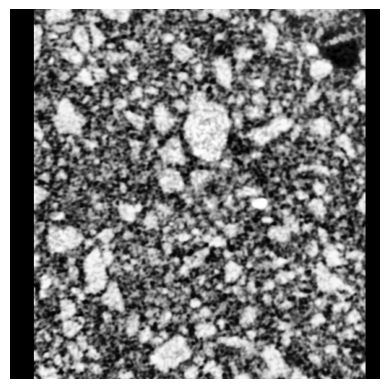

In [1]:
import itk
import numpy as np
import matplotlib.pyplot as plt
import os, cv2
from math import radians
os.environ['KMP_DUPLICATE_LIB_OK']='True'

start_index = 10
end_index = 49
count = end_index - start_index + 1
image_path = "D:/workspace/ml-workspace/registration/datasets/sample4/ct/s1/enhanced"
image1 = cv2.imread(f"{image_path}/slice_enhanced_10.bmp", cv2.IMREAD_GRAYSCALE)
image_filenames = [f"{image_path}/slice_enhanced_{start_index + i}.bmp" for i in range(count)]
image_shape = (len(image_filenames), image1.shape[0], image1.shape[1])

image_array = np.zeros(image_shape, dtype=np.uint8)
for i, filename in enumerate(image_filenames):
    image_ = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    image_array[i] = image_

itk_img = itk.image_from_array(image_array)
print(f"spacing: {itk_img.GetSpacing()}")
print(f"largest possible region: {itk_img.GetLargestPossibleRegion().GetSize()}")
print(f"origin: {itk_img.GetOrigin()}")
print(f"direction: {itk_img.GetDirection()}")

# 进行切片
# 定义变换（以沿任意方向切片为例）
# 进行多个变换的组合
# composite_transform = itk.CompositeTransform[itk.D, 3].New()

# rotation_transformX = itk.Euler3DTransform[itk.D].New()
# rotation_transformX.SetRotation(radians(0), radians(0), radians(0))

# rotation_transformY = itk.Euler3DTransform[itk.D].New()
# rotation_transformY.SetRotation(radians(0), radians(1), radians(0))

# composite_transform.AddTransform(rotation_transformX)
# composite_transform.AddTransform(rotation_transformY)

# 将旋转轴移动到浮动图片的中心位置进行旋转

rotation_center = (960.0, 960.0, 20)

# 定义平移和旋转参数
translation_to_origin = itk.TranslationTransform[itk.D, 3].New()
translation_to_origin.SetOffset(rotation_center)

rotation = itk.Euler3DTransform.New()
rotation.SetRotation(radians(0), radians(5), radians(0))

translation_back = itk.TranslationTransform[itk.D, 3].New()
translation_back.SetOffset(-1.0 * np.array(rotation_center))

# 创建组合变换
transform = itk.CompositeTransform[itk.D, 3].New()
transform.AddTransform(translation_to_origin)
transform.AddTransform(rotation)
transform.AddTransform(translation_back)

# 应用变换
resampler = itk.ResampleImageFilter.New(Input=itk_img)

# # 欧拉角旋转
# rotation_transform = itk.Euler3DTransform[itk.D].New()
# rotation_transform.SetRotation(radians(0), radians(0), radians(0))

# # rotation_axis = (0, 1, 0)  # 以 y 轴为例，可根据需要调整
# # rotation_angle = -0.2 * np.pi / 180  # 旋转1度，可根据需要调整
# # transform.Rotate3D(rotation_axis, rotation_angle, False)
# # 设置重采样过滤器
# resampler = itk.ResampleImageFilter.New(Input=itk_img)
resampler.SetDefaultPixelValue(0)
resampler.SetTransform(transform)
resampler.SetSize(itk_img.GetLargestPossibleRegion().GetSize())
resampler.SetOutputOrigin(itk_img.GetOrigin())
resampler.SetOutputSpacing(itk_img.GetSpacing())
resampler.SetOutputDirection(itk_img.GetDirection())
resampler.Update()

# 获取重采样后的图像
resampled_image = resampler.GetOutput()
# Display the images
# plt.figure(figsize=(12, 8))
# plt.subplot(2, 6, 1), plt.imshow(itk.array_view_from_image(resampled_image)[0, :, :], cmap='gray'), plt.title('0')
# plt.subplot(2, 6, 2), plt.imshow(itk.array_view_from_image(resampled_image)[1, :, :], cmap='gray'), plt.title('1')
# plt.subplot(2, 6, 3), plt.imshow(itk.array_view_from_image(resampled_image)[2, :, :], cmap='gray'), plt.title('2')
# plt.subplot(2, 6, 4), plt.imshow(itk.array_view_from_image(resampled_image)[3, :, :], cmap='gray'), plt.title('3')
# plt.subplot(2, 6, 5), plt.imshow(itk.array_view_from_image(resampled_image)[4, :, :], cmap='gray'), plt.title('4')
# plt.subplot(2, 6, 6), plt.imshow(itk.array_view_from_image(resampled_image)[5, :, :], cmap='gray'), plt.title('5')
# plt.subplot(2, 6, 7), plt.imshow(itk.array_view_from_image(resampled_image)[6, :, :], cmap='gray'), plt.title('6')
# plt.subplot(2, 6, 8), plt.imshow(itk.array_view_from_image(resampled_image)[7, :, :], cmap='gray'), plt.title('7')
# plt.subplot(2, 6, 9), plt.imshow(itk.array_view_from_image(resampled_image)[8, :, :], cmap='gray'), plt.title('8')
# plt.subplot(2, 6, 10), plt.imshow(itk.array_view_from_image(resampled_image)[9, :, :], cmap='gray'), plt.title('9')
# plt.subplot(2, 6, 11), plt.imshow(itk.array_view_from_image(resampled_image)[10, :, :], cmap='gray'), plt.title('10')
# plt.subplot(2, 6, 12), plt.imshow(itk.array_view_from_image(resampled_image)[11, :, :], cmap='gray'), plt.title('11')

slice_width = 512
slice_height = 512
# 定义所需切片的大小和位置
size = [slice_width, slice_height, count]
size[2] = 1  # 设置 x 方向大小为 0（或者选择其他方向）
region = itk.ImageRegion[3]()
region.SetSize(size)
region.SetIndex([704, 704, 20])  # 选择开始的索引，可以调整

# 使用 ExtractImageFilter 提取切片
extract_filter = itk.ExtractImageFilter.New(Input=resampled_image, ExtractionRegion=region)
extract_filter.Update()
# 获取切片
slice_image = extract_filter.GetOutput()
# 将切片转换为 NumPy 数组并显示
slice_array = itk.GetArrayFromImage(slice_image)
plt.imshow(np.squeeze(slice_array), cmap='gray')
plt.axis('off')
plt.show()

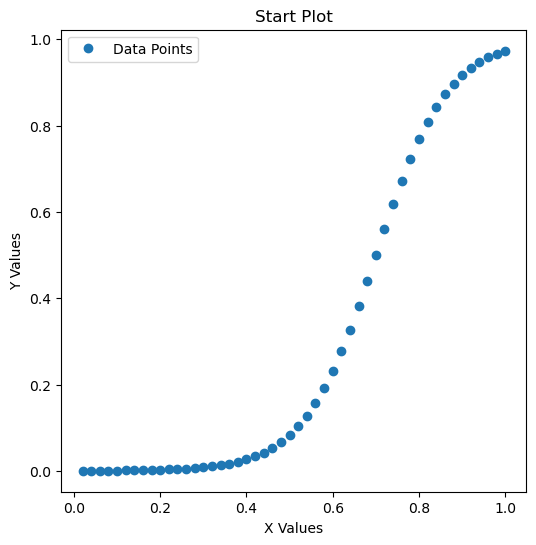

In [2]:
import numpy as np
from glob import glob
import os
from munch import Munch
import matplotlib.pyplot as plt

from pathlib import Path

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

all_iteration = 50

def auto_nonlinear_sp_lambda(iteration, k=12, a=0.7):
    x = iteration / all_iteration
    return 1 / (1 + np.exp(-k * (x - a))), x

xs = []
ys = []

for i in range(all_iteration):
    y,x = auto_nonlinear_sp_lambda(i + 1)
    xs.append(x)
    ys.append(y)


# 绘制散点图
plt.figure(figsize=(6, 6))
plt.plot(np.array(xs), np.array(ys), 'o', label='Data Points')  # 修正plot函数调用，增加标记样式
plt.title('Start Plot')  # 将标题设置为单独的方法调用
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.legend()  # 如果需要显示图例的话
plt.show()  # 显示图形


Cluster centers (gray values):
[[ 77.92902215]
 [  0.46478244]
 [132.62699066]
 [ 54.52190489]
 [ 99.32511496]]


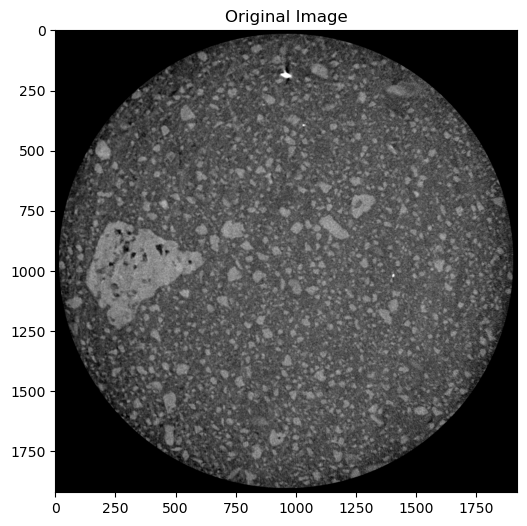

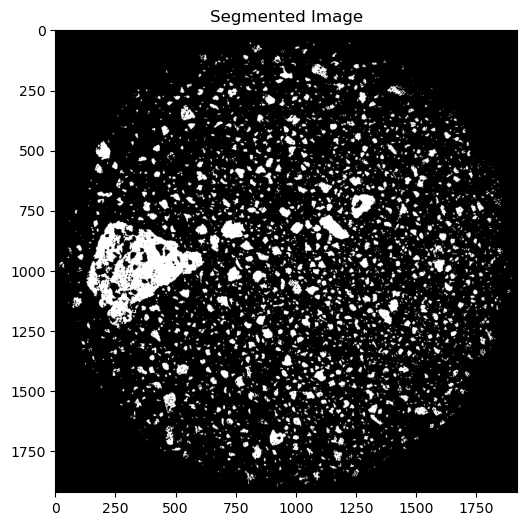

: 

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 读取灰度图像
image = cv2.imread('test_imgs/ct12.bmp', cv2.IMREAD_GRAYSCALE)


# 获取图像的形状
h, w = image.shape

# 将图像数据转换为二维数组（每行代表一个像素）
image_2d = image.reshape(-1, 1)

# 使用KMeans进行聚类
k = 5  # 聚类的数量
kmeans = KMeans(n_clusters=k)
# 将聚类结果可视化, labels展平的是分的几个类别
labels = kmeans.fit_predict(image_2d)

# 查看聚类中心
cluster_centers = kmeans.cluster_centers_
print("Cluster centers (gray values):")
print(cluster_centers)

max_cluster_index = np.argmax(cluster_centers).item()

# 如何固定每个类别的索引呢，这个不太好固定，因为我们只能知道最大水泥颗粒对应的类别

# 将聚类结果映射回原始图像尺寸
segmented_image = np.zeros((h, w), dtype=np.uint8)
for i in range(len(labels)):
    intensity = 0
    if labels[i].item() == max_cluster_index: intensity = 255
    segmented_image[i // w, i % w] = intensity #labels[i] * (255 // (k - 1))


# segmented_image = cluster_centers[labels].reshape(h, w)

# 展示原图
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

# 展示分割后的图像
plt.figure(figsize=(6, 6))
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')
plt.show()


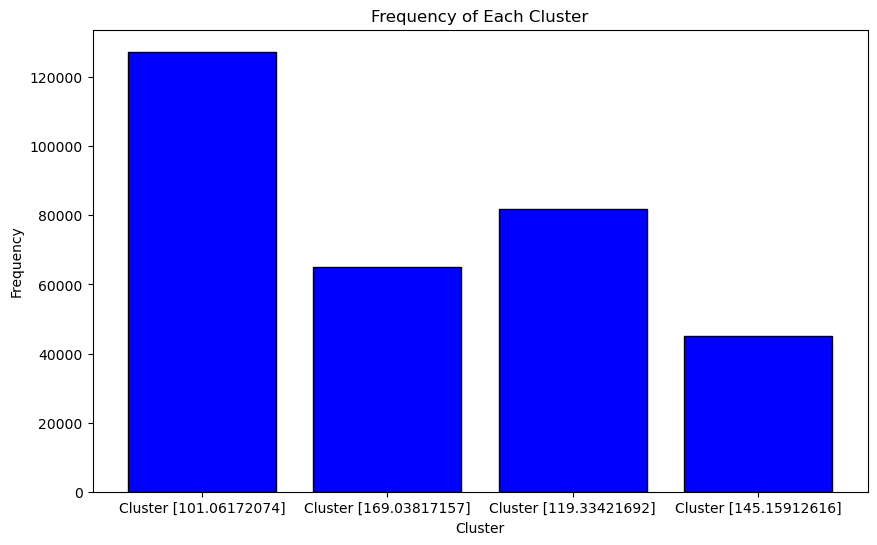

In [9]:
# 统计各个类别的频率
unique_labels, counts = np.unique(labels, return_counts=True)

# 绘制直方图
plt.figure(figsize=(10, 6))
plt.bar(unique_labels, counts, tick_label=[f'Cluster {cluster_centers[i]}' for i in unique_labels], color='blue', edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Frequency of Each Cluster')
plt.show()